In [ ]:
Objective:
As part of this project, you need to focus on understanding, cleaning, describing, visualizing, and 
transforming data to bring data to life and tell your own version of the story and unveil some hidden insights. 
Primary objective is to come up with creative features using given data and external sources and 
focus less on making a highly accurate model. 

Visualization Tool: You have the option to visualize your charts using Python (library of choice), 
    Tableau, Domo, PowerBI, Google Data Studio or any other visualization tool of choice, 
    so you can focus on feature engineering part.
    
Label: Create a label (target variable) using Civilian_Casualties by converting it into a binary variable 0 / 1 so the modelling problem becomes a classification problem. 
Label = 0 if  Civilian_Casualties = 0
Label = 1 if  Civilian_Casualties > 0


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# (1) Importing dataset

## (1a) incident dataset

In [2]:
# main dataset: https://open.toronto.ca/dataset/fire-incidents/
incident=pd.read_csv('group_data/Fire_incidents_Data.csv')
print(incident.shape)
incident.head(3)

(17536, 43)


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25T02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-25T02:04:29,2018-02-25T02:10:11,0
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25T02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25T02:24:43,2018-02-25T02:29:31,0
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaN,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25T19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:29:59,2018-02-25T18:36:49,0


In [213]:
incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   _id                                                            17536 non-null  int64  
 1   Area_of_Origin                                                 15623 non-null  object 
 2   Building_Status                                                11216 non-null  object 
 3   Business_Impact                                                11214 non-null  object 
 4   Civilian_Casualties                                            17536 non-null  int64  
 5   Count_of_Persons_Rescued                                       17536 non-null  int64  
 6   Estimated_Dollar_Loss                                          15627 non-null  float64
 7   Estimated_Number_Of_Persons_Displaced                     

In [4]:
incident.Incident_Station_Area.unique()

array([441, 116, 221, 133, 132, 215, 235, 231, 332, 426, 225, 325, 226,
       341, 421, 244, 141, 115, 415, 431, 331, 413, 314, 333, 311, 145,
       143, 342, 443, 312, 223, 134, 214, 434, 423, 233, 114, 112, 224,
       326, 212, 343, 135, 125, 315, 234, 324, 113, 142, 146, 313, 442,
       222, 241, 345, 232, 121, 432, 425, 334, 411, 445, 243, 323, 435,
       213, 422, 412, 123, 344, 111, 242, 321, 433, 245, 211, 131, 322,
       444, 122, 335, 227, 346, 424])

In [5]:
incident[incident.Incident_Station_Area == 211]

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
280,1947209,91 - Multiple Areas of Origin,NaN,NaN,0,0,3000.0,NaN,NaN,2018-01-30T04:30:00,NaN,01 - Fire,NaN,NaN,NaN,2018-01-30T04:45:15,999 - Undetermined,F18011848,211,25.0,Vehicle Fire,Sewell's Rd / Steeles Ave E,2018-01-30T04:58:53,43.846204,NaN,-79.209296,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,901 - Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-01-30T04:16:20,2018-01-30T04:29:22,0
530,1947459,"71 - Open Area (inc lawn, field, farmyard, par...",NaN,NaN,0,0,0.0,NaN,NaN,2018-03-24T17:34:00,NaN,01 - Fire,NaN,NaN,NaN,2018-03-24T17:38:00,"93 - Hot Ashes, Embers, Spark",F18030105,211,23.0,Fire - Grass/Rubbish,Markham Rd / Nashdene Rd,2018-03-24T18:58:16,43.820239,NaN,-79.246187,"51 - Bush, Grass, Tree, Leaves, etc.",1 - Extinguished by fire department,2,6,99 - Undetermined,"861 - Open Land (eg. light ground cover, bush,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 - Flames showing from large area (more than ...,2018-03-24T17:20:11,2018-03-24T17:33:18,0
554,1947483,46 - Product Storage (inc products or material...,01 - Normal (no change),3 - May resume operations within a month,0,0,50000.0,5.0,NaN,2018-01-07T01:41:50,2 - Confined to part of room/area of origin,01 - Fire,1 - All persons (at risk of injury) evacuated ...,1 - Fire alarm system operated,1 - Fire alarm system present,2018-01-07T01:53:47,"44 - Iron, Pressing Machine",F18002572,211,23.0,Fire - Commercial/Industrial,Tapscott Rd / Melford Dr,2018-01-07T03:56:03,43.808048,001,-79.234197,33 - Linen Other than Bedding,1 - Extinguished by fire department,14,45,"60 - Other unintentional cause, not classified","404 - Laundry, Dry Cleaner (includes self-serv...",2 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,2 - Hardwired (standalone),1 - All persons (at risk of injury) self evacu...,8 - Entire Structure,1 - Sprinkler system activated,1 - Full sprinkler system present,3 - Fire with smoke showing only - including v...,2018-01-07T01:32:50,2018-01-07T01:37:38,0
565,1947494,83 - Electrical Systems,NaN,NaN,0,0,20000.0,NaN,NaN,2018-02-12T14:10:50,NaN,01 - Fire,NaN,NaN,NaN,2018-02-12T14:10:01,81 - Vehicle - Electrical,F18016471,211,NaN,Vehicle Fire,Markham Rd / Steeles Ave E,2018-02-12T14:28:16,43.836599,NaN,-79.251189,43 - Electrical Wiring Insulation,1 - Extinguished by fire department,1,3,52 - Electrical Failure,"902 - Small Truck (eg. pick-up, van, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2018-02-12T14:01:02,2018-02-12T14:07:01,0
574,1947503,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaN,NaN,F19055237,211,23.0,Fire - Commercial/Industrial,Markham Rd / Finch Ave E,2019-05-31T05:48:06,43.812971,NaN,-79.243076,NaN,NaN,6,23,NaN,498 - Garage: General Auto Parking - Structure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-31T04:39:42,2019-05-31T04:47:13,0
637,1947566,"21 - Living Area (e.g. living, TV, recreation,...",01 - Norm

In [6]:
incident.columns

Index(['_id', 'Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Exposures', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire',
       'Final_Incident_Type', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Number',
       'Incident_Station_Area', 'Incident_Ward', 'Initial_CAD_Event_Type',
       'Intersection', 'Last_TFS_Unit_Clear_Time', 'Latitude',
       'Level_Of_Origin', 'Longitude', 'Material_First_Ignited',
       'Method_Of_Fire_Control', 'Number_of_responding_apparatus',
       'Number_of_responding_personnel', 'Possible_Cause', 'Property_Use',
       'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons

In [214]:
# Deterime the pecentage of nan per column
incident.isnull().sum()/incident.shape[0]*100

_id                                                               0.000000
Area_of_Origin                                                   10.908987
Building_Status                                                  36.040146
Business_Impact                                                  36.051551
Civilian_Casualties                                               0.000000
Count_of_Persons_Rescued                                          0.000000
Estimated_Dollar_Loss                                            10.886177
Estimated_Number_Of_Persons_Displaced                            36.045849
Exposures                                                        98.101049
Ext_agent_app_or_defer_time                                      10.914690
Extent_Of_Fire                                                   36.051551
Final_Incident_Type                                               0.000000
Fire_Alarm_System_Impact_on_Evacuation                           36.051551
Fire_Alarm_System_Operati

## (1b) fire station location

In [178]:
station=pd.read_csv('group_data/fire-station-locations.csv')
print(station.shape)
station.head(3)

(84, 23)


,_id,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,GENERAL_USE,CLASS_FAMILY_DESC,ADDRESS_ID_LINK,PLACE_NAME,X,Y,LATITUDE,LONGITUDE,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry
0,1,21,FIRE STATION 211,900 TAPSCOTT RD,4236992,363382,4236991,REGULAR,900,Tapscott Rd,NaN,Fire/Ambulance Stations,"Land, Structure, Structure Entrance",NaN,"Fire Station 211, Ambulance Station 27",NaN,NaN,NaN,NaN,Scarborough North (23),Scarborough,1520443,"{u'type': u'Point', u'coordinates': (-79.24287..."
1,2,60,FIRE STATION 342,106 ASCOT AVE,764237,70190,1140634,REGULAR,106,Ascot Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 342,NaN,NaN,NaN,NaN,Davenport (9),former Toronto,1541526,"{u'type': u'Point', u'coordinates': (-79.44862..."
2,3,61,FIRE STATION 343,65 HENDRICK AVE,819425,127148,1140587,REGULAR,65,Hendrick Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 343,NaN,NaN,NaN,NaN,Toronto-St. Paul's (12),former Toronto,1543317,"{u'type': u'Point', u'coordinates': (-79.43075..."


In [179]:
station['fs_Longitude'] = station['geometry'].str.extract('([-]?[0-9]*[.]{0,1}[0-9]{10})').astype(float)
station['fs_Latitude'] = station['geometry'].str[53:-2].astype(float)

In [10]:
station.head(3)

,_id,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,GENERAL_USE,CLASS_FAMILY_DESC,ADDRESS_ID_LINK,PLACE_NAME,X,Y,LATITUDE,LONGITUDE,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude
0,1,21,FIRE STATION 211,900 TAPSCOTT RD,4236992,363382,4236991,REGULAR,900,Tapscott Rd,NaN,Fire/Ambulance Stations,"Land, Structure, Structure Entrance",NaN,"Fire Station 211, Ambulance Station 27",NaN,NaN,NaN,NaN,Scarborough North (23),Scarborough,1520443,"{u'type': u'Point', u'coordinates': (-79.24287...",-79.242870,43.823993
1,2,60,FIRE STATION 342,106 ASCOT AVE,764237,70190,1140634,REGULAR,106,Ascot Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 342,NaN,NaN,NaN,NaN,Davenport (9),former Toronto,1541526,"{u'type': u'Point', u'coordinates': (-79.44862...",-79.448626,43.679366
2,3,61,FIRE STATION 343,65 HENDRICK AVE,819425,127148,1140587,REGULAR,65,Hendrick Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 343,NaN,NaN,NaN,NaN,Toronto-St. Paul's (12),former Toronto,1543317,"{u'type': u'Point', u'coordinates': (-79.43075...",-79.430752,43.680105


In [11]:
station.NAME.unique()

array(['FIRE STATION 211', 'FIRE STATION 342', 'FIRE STATION 343',
       'FIRE STATION 332', 'FIRE STATION 214', 'FIRE STATION 426',
       'FIRE STATION 422', 'FIRE STATION 232', 'FIRE STATION 121',
       'FIRE STATION 412', 'FIRE STATION 134', 'FIRE STATION 314',
       'FIRE STATION 331', 'FIRE STATION 115', 'FIRE STATION 132',
       'FIRE STATION 433', 'FIRE STATION 441', 'FIRE STATION 341',
       'FIRE STATION 434', 'FIRE STATION 311', 'FIRE STATION 323',
       'FIRE STATION 234', 'FIRE STATION 435', 'FIRE STATION 424',
       'FIRE STATION 221', 'FIRE STATION 224', 'FIRE STATION 244',
       'FIRE STATION 226', 'FIRE STATION 123', 'FIRE STATION 131',
       'FIRE STATION 223', 'FIRE STATION 231', 'FIRE STATION 312',
       'FIRE STATION 243', 'FIRE STATION 444', 'FIRE STATION 215',
       'FIRE STATION 423', 'FIRE STATION 212', 'FIRE STATION 227',
       'FIRE STATION 222', 'FIRE STATION 322', 'FIRE STATION 213',
       'FIRE STATION 321', 'FIRE STATION 445', 'FIRE STATION 4

In [180]:
station['Station_Area']= station.NAME.str.extract('(\d+)')
station['Station_Area'] = station['Station_Area'].apply(pd.to_numeric)

In [13]:
incident.Incident_Station_Area.unique()

array([441, 116, 221, 133, 132, 215, 235, 231, 332, 426, 225, 325, 226,
       341, 421, 244, 141, 115, 415, 431, 331, 413, 314, 333, 311, 145,
       143, 342, 443, 312, 223, 134, 214, 434, 423, 233, 114, 112, 224,
       326, 212, 343, 135, 125, 315, 234, 324, 113, 142, 146, 313, 442,
       222, 241, 345, 232, 121, 432, 425, 334, 411, 445, 243, 323, 435,
       213, 422, 412, 123, 344, 111, 242, 321, 433, 245, 211, 131, 322,
       444, 122, 335, 227, 346, 424])

In [181]:
incident = pd.merge(incident,station, how='left',left_on='Incident_Station_Area', right_on = 'Station_Area')

In [15]:
print(incident.shape)
incident.sample(3)

(17536, 69)


,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,GENERAL_USE,CLASS_FAMILY_DESC,ADDRESS_ID_LINK,PLACE_NAME,X,Y,LATITUDE,LONGITUDE,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude,Station_Area
15601,1962530,24 - Cooking Area or Kitchen,01 - Normal (no change),1 - No business interruption,2,2,50.0,0.0,NaN,2011-12-09T23:41:00,1 - Confined to object of origin,01 - Fire,1 - All persons (at risk of injury) evacuated ...,1 - Fire alarm system operated,1 - Fire alarm system present,2011-12-09T23:42:00,"11 - Stove, Range-top burner",F11156858,322,29.0,FIR,Broadview Ave / Hillside Dr,2011-12-10T00:24:11,43.685980,001,-79.356300,54 - Plastic,1 - Extinguished by fire department,5,17,44 - Unattended,323 - Multi-Unit Dwelling - Over 12 Units,2 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,1 - All persons (at risk of injury) self evacu...,5 - Multi unit bldg: spread beyond suite of or...,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-12-09T23:35:12,2011-12-09T23:39:46,0,41,49,FIRE STATION 322,256 COSBURN AVE,19832,256667,14646506,REGULAR,256,Cosburn Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 322,NaN,NaN,NaN,NaN,Toronto-Danforth (14),East York,2455220,"{u'type': u'Point', u'coordinates': (-79.34234...",-79.342344,43.690986,322
6451,1953380,81 - Engine Area,NaN,NaN,0,0,0.0,NaN,NaN,2013-07-17T18:16:57,NaN,01 - Fire,NaN,NaN,NaN,2013-07-17T18:14:41,999 - Undetermined,F13057932,441,2.0,VEF,Vice Regent Blvd / Queen's Plate Dr,2013-07-17T18:33:11,43.711770,NaN,-79.591010,71 - Gasoline,3 - Extinguished by occupant,1,4,99 - Undetermined,"902 - Small Truck (eg. pick-up, van, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 - Fire extinguished prior to arrival,2013-07-17T18:06:22,2013-07-17T18:14:39,0,17,80,FIRE STATION 441,947 MARTIN GROVE RD,6044964,22707,6044958,REGULAR,947,Martin Grove Rd,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 441,NaN,NaN,NaN,NaN,Etobicoke North (1),Etobicoke,1959089,"{u'type': u'Point', u'coordinates': (-79.57191...",-79.571920,43.694960,441
2934,1949863,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),1 - No business interruption,1,0,300.0,0.0,NaN,2018-12-28T20:31:30,1 - Confined to object of origin,01 - Fire,7 - Not applicable: Occupant(s) first alerted ...,8 - Not applicable (no system),2 - No Fire alarm system,2018-12-28T20:31:30,43 - Clothes Dryer,F18138098,342,9.0,Fire - Residential,Rosethorn Ave / Turnberry Ave,2018-12-28T20:53:19,43.678866,001,-79.462845,"58 - Fabric - Synthetic, Combination",3 - Extinguished by occupant,6,21,51 - Mechanical Failure,302 - Semi-Detached Dwelling,2 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,7 - Not applicable: Occupant(s) first alerted ...,"7 - Spread to othe

In [182]:
# Compute distance between fire location and its fire station
# Distance Feature

import numpy as np

def haversine_distance(row):
    lat_p, lon_p = row['Latitude'], row['Longitude'] # fire location
    lat_d, lon_d = row['fs_Longitude'], row['fs_Longitude'] # fire station location
    radius = 6371 # km

# convert decimal degrees to radians 
    dlat = np.radians(lat_d - lat_p)
    dlon = np.radians(lon_d - lon_p)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat_p)) * np.cos(np.radians(lat_d)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = radius * c

    return distance

incident['distance_fr_fs'] = incident.apply(haversine_distance, axis = 1)

In [17]:
incident.head()

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,GENERAL_USE,CLASS_FAMILY_DESC,ADDRESS_ID_LINK,PLACE_NAME,X,Y,LATITUDE,LONGITUDE,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude,Station_Area,distance_fr_fs
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25T02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-25T02:04:29,2018-02-25T02:10:11,0,17,80,FIRE STATION 441,947 MARTIN GROVE RD,6044964,22707,6044958,REGULAR,947,Martin Grove Rd,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 441,NaN,NaN,NaN,NaN,Etobicoke North (1),Etobicoke,1959089,"{u'type': u'Point', u'coordinates': (-79.57191...",-79.571920,43.694960,441,13705.717515
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25T02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25T02:24:43,2018-02-25T02:29:31,0,46,6,FIRE STATION 116,255 ESTHER SHINER BLVD,8731578,1464220,30005958,REGULAR,255,Esther Shiner Blvd,NaN,Fire Station,"Structure, Structure Entrance",484876.0,Fire Station 116,NaN,NaN,NaN,NaN,Don Valley North (17),North York,2607109,"{u'type': u'Point', u'coordinates': (-79.36506...",-79.365064,43.769146,116,13691.564674
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaN,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25T19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:29:59,2018-02-25T18:36:49,0,25,26,FIRE STATION 221,2575 EGLINTON AVE E,330710,317332,111065,REGULAR,2575,Eglinton Ave E,NaN,Restaurant,"Land, Structure, Structure Entrance",NaN,NaN,NaN,NaN,NaN,NaN,Scarborough Southwest (20),Scarborough,2048861,"{u'type': u'Point', u'coordinates': (-79.25506...",-79.255063,43.734790,221,13676.786172
3,1946932,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25T19:19:25,1 - Confined to object of origin,01 - Fire,9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,2018-02-25T19:20:00,999 - Undetermined,F18021192,133,5.0,Fire - Commercial/Industrial,Keele St / Lawrence Ave W,2018-02-25T20:07:42,43.708659,999,-79.478062,99 - Undetermined (formerly 98

In [18]:
# Deterime the pecentage of nan per column
incident.isnull().sum()/incident.shape[0]*100

_id_x                                                              0.000000
Area_of_Origin                                                    10.908987
Building_Status                                                   36.040146
Business_Impact                                                   36.051551
Civilian_Casualties                                                0.000000
Count_of_Persons_Rescued                                           0.000000
Estimated_Dollar_Loss                                             10.886177
Estimated_Number_Of_Persons_Displaced                             36.045849
Exposures                                                         98.101049
Ext_agent_app_or_defer_time                                       10.914690
Extent_Of_Fire                                                    36.051551
Final_Incident_Type                                                0.000000
Fire_Alarm_System_Impact_on_Evacuation                            36.051551
Fire_Alarm_S

In [183]:
# remove columns that have more than 90% nan rows
incident = incident.loc[:,incident.isnull().sum() < 0.9*incident.shape[0]]

In [198]:
# Deterime the pecentage of nan per column
incident.isnull().sum()/incident.shape[0]*100

_id_x                                                             0.000000
Area_of_Origin                                                   10.908987
Building_Status                                                  36.040146
Business_Impact                                                   0.000000
Civilian_Casualties                                               0.000000
Count_of_Persons_Rescued                                          0.000000
Estimated_Dollar_Loss                                            10.886177
Estimated_Number_Of_Persons_Displaced                            36.045849
Ext_agent_app_or_defer_time                                      10.914690
Extent_Of_Fire                                                   36.051551
Final_Incident_Type                                               0.000000
Fire_Alarm_System_Impact_on_Evacuation                           36.051551
Fire_Alarm_System_Operation                                      36.051551
Fire_Alarm_System_Presenc

## handles all dates related

In [3]:
#Convert the string to datetime format

date_var = ["TFS_Alarm_Time", "TFS_Arrival_Time", "Fire_Under_Control_Time", "Last_TFS_Unit_Clear_Time"]
incident[date_var] = incident[date_var].apply(pd.to_datetime)

In [4]:
incident['INCIDENT_DATE']= incident['TFS_Alarm_Time'].apply(lambda x: x.date())
incident['INCIDENT_DATE'] = incident['INCIDENT_DATE'].apply(pd.to_datetime)
incident['DOW']= incident['INCIDENT_DATE'].apply(lambda x: x.weekday())
incident['IS_WEEKEND'] = incident['INCIDENT_DATE'].apply(lambda x: 1 if x.weekday() in (5, 6) else 0)

In [5]:
incident['YEAR'] = pd.DatetimeIndex(incident['INCIDENT_DATE']).year
incident['MONTH'] = pd.DatetimeIndex(incident['INCIDENT_DATE']).month

In [44]:
incident.sample(3)

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,GENERAL_USE,CLASS_FAMILY_DESC,PLACE_NAME,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude,Station_Area,distance_fr_fs,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH,label,MINUTES_TO_ARRIVE,TFS_Arr_day,TFS_Alm_day,TFS_Arr_hour,TFS_Alm_hour
3011,1949940,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0,0,1000.0,0.0,2018-11-25T18:18:33,2 - Confined to part of room/area of origin,01 - Fire,7 - Not applicable: Occupant(s) first alerted ...,2 - Fire alarm system did not operate,1 - Fire alarm system present,2018-11-25 18:32:00,"11 - Stove, Range-top burner",F18126270,423,4.0,Fire - Residential,Glenlake Ave / High Park Ave,2018-11-25 18:43:15,43.657228,021,-79.46685,14 - Interior Wall/Ceiling,3 - Extinguished by occupant,6,21,44 - Unattended,323 - Multi-Unit Dwelling - Over 12 Units,4 - Floor/suite of fire origin: Smoke alarm pr...,2 - Dead battery,1 - Battery operated,4 - Alarm operated but failed to alert occupan...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2018-11-25 18:08:32,2018-11-25 18:11:41,0,37,71,FIRE STATION 423,358 KEELE ST,7583839,66462,14014794,REGULAR,358,Keele St,Fire Station,"Land, Structure, Structure Entrance",Fire Station 423,Parkdale-High Park (4),former Toronto,2286011,"{u'type': u'Point', u'coordinates': (-79.46475...",-79.464754,43.664742,423,13690.539714,2018-11-25,6,1,2018,11,0,3.150,25,25,18,18
14771,1961700,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0,0,100000.0,3.0,2012-10-16T20:56:28,"4 - Spread beyond room of origin, same floor",01 - Fire,7 - Not applicable: Occupant(s) first alerted ...,8 - Not applicable (no system),2 - No Fire alarm system,2012-10-16 21:49:37,"73 - Blow Torch, Bunsen Burner",F12103268,443,4.0,FIR,La Rose Ave / Hamptonbrook Dr,2012-10-17 02:52:50,43.681760,001,-79.53894,14 - Interior Wall/Ceiling,1 - Extinguished by fire department,20,66,50 - Other misuse of ignition source/material ...,301 - Detached Dwelling,3 - Floor/suite of fire origin: Smoke alarm pr...,4 - Remote from fire – smoke did not reach alarm,1 - Battery operated,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,4 - Flames showing from small area (one storey...,2012-10-16 20:46:47,2012-10-16 20:51:23,0,62,82,FIRE STATION 443,1724 ISLINGTON AVE,1009102,38844,30023253,REGULAR,1724,Islington Ave,Fire Station,"Land, Structure, Structure Entrance",Fire Station 443,Etobicoke Centre (2),Etobicoke,3035181,"{u'type': u'Point', u'coordinates': (-79.53855...",-79.538554,43.678071,443,13701.473737,2012-10-16,1,0,2012,10,0,4.600,16,16,20,20
8992,1955921,81 - Engine Area,NaN,NaN,0,0,1500.0,NaN,2016-07-30T09:04:36,NaN,01 - Fire,NaN,NaN,NaN,2016-07-30 09:09

## review Latitude and Longitude                                                  

In [21]:
incident[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,17535.000000,17535.000000
mean,43.707946,-79.404493
std,0.052671,0.104936
min,43.587350,-79.636530
25%,43.663190,-79.485675
50%,43.702250,-79.405305
75%,43.752030,-79.335610
max,43.848190,-79.123103


In [22]:
incident[incident.Latitude.isnull()]

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,GENERAL_USE,CLASS_FAMILY_DESC,PLACE_NAME,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,Station_Area,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH
17500,1964429,81 - Engine Area,NaN,NaN,0,0,3000.0,NaN,2011-09-26T23:03:00,NaN,01 - Fire,NaN,NaN,NaN,2011-09-26 23:07:00,81 - Vehicle - Electrical,F11126605,214,NaN,VEFH,NaN,2011-09-26 23:35:00,NaN,NaN,NaN,99 - Undetermined (formerly 98),1 - Extinguished by fire department,3,10,51 - Mechanical Failure,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2011-09-26 22:55:12,2011-09-26 23:01:00,0,5,24,FIRE STATION 214,745 MEADOWVALE RD,6349868,357277,6349869,REGULAR,745,Meadowvale Rd,Fire Station,"Land, Structure, Structure Entrance",Fire Station 214,Scarborough-Rouge Park (25),Scarborough,1567567,"{u'type': u'Point', u'coordinates': (-79.16360...",214,2011-09-26,0,0,2011,9


In [23]:
incident[incident.Longitude.isnull()]

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,GENERAL_USE,CLASS_FAMILY_DESC,PLACE_NAME,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,Station_Area,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH
17500,1964429,81 - Engine Area,NaN,NaN,0,0,3000.0,NaN,2011-09-26T23:03:00,NaN,01 - Fire,NaN,NaN,NaN,2011-09-26 23:07:00,81 - Vehicle - Electrical,F11126605,214,NaN,VEFH,NaN,2011-09-26 23:35:00,NaN,NaN,NaN,99 - Undetermined (formerly 98),1 - Extinguished by fire department,3,10,51 - Mechanical Failure,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2011-09-26 22:55:12,2011-09-26 23:01:00,0,5,24,FIRE STATION 214,745 MEADOWVALE RD,6349868,357277,6349869,REGULAR,745,Meadowvale Rd,Fire Station,"Land, Structure, Structure Entrance",Fire Station 214,Scarborough-Rouge Park (25),Scarborough,1567567,"{u'type': u'Point', u'coordinates': (-79.16360...",214,2011-09-26,0,0,2011,9


In [20]:
# what is the best way to impute? or just remove since it is only one record!!



In [24]:
# none of the rows is duplicated
incident.duplicated().any().sum()

0

In [25]:
incident.groupby(['Business_Impact'])[['Civilian_Casualties', 'Estimated_Dollar_Loss']].sum()

,Civilian_Casualties,Estimated_Dollar_Loss
Business_Impact,,
1 - No business interruption,431,71947891.0
2 - May resume operations within a week,45,24042042.0
3 - May resume operations within a month,10,13783000.0
4 - May resume operations within a year,2,14204999.0
5 - May not resume operations,7,80166551.0
8 - Not applicable (not a business),692,169575994.0
9 - Undetermined,75,107850101.0


In [ ]:
sns.pairplot

## process target

In [6]:
incident['label'] = 0
incident.loc[incident.Civilian_Casualties > 0, 'label']=1

In [27]:
pd.crosstab(incident.label, incident.Civilian_Casualties)

Civilian_Casualties,0,1,2,3,4,5,6,7,8,15
label,,,,,,,,,,
0,16543,0,0,0,0,0,0,0,0,0
1,0,807,116,40,20,2,4,1,2,1


# EDA

## time related

In [188]:
# how long does it take for fire services to arrive at the incident location
# get the number of minutes it took for Fire Services to arrive to the emergency
incident["MINUTES_TO_ARRIVE"] = np.around((incident["TFS_Arrival_Time"] - 
                            incident["TFS_Alarm_Time"]) / np.timedelta64(1, "m"), decimals=3)

In [29]:
incident[['TFS_Arrival_Time','TFS_Alarm_Time','MINUTES_TO_ARRIVE']].head(10)

,TFS_Arrival_Time,TFS_Alarm_Time,MINUTES_TO_ARRIVE
0,2018-02-25 02:10:11,2018-02-25 02:04:29,5.700
1,2018-02-25 02:29:31,2018-02-25 02:24:43,4.800
2,2018-02-25 18:36:49,2018-02-25 18:29:59,6.833
3,2018-02-25 19:18:07,2018-02-25 19:13:39,4.467
4,2018-02-25 23:26:19,2018-02-25 23:20:43,5.600
5,2018-02-25 23:35:17,2018-02-25 23:31:19,3.967
6,2018-02-26 23:24:47,2018-02-26 23:18:55,5.867
7,2018-02-27 15:35:13,2018-02-27 15:28:12,7.017
8,2018-02-25 20:52:04,2018-02-25 20:48:34,3.500
9,2018-02-26 20:37:40,2018-02-26 20:32:11,5.483


In [7]:
incident['TFS_Arr_day'] = incident['TFS_Arrival_Time'].dt.day
incident['TFS_Alm_day'] = incident['TFS_Alarm_Time'].dt.day

incident['TFS_Arr_hour'] = incident['TFS_Arrival_Time'].dt.hour
incident['TFS_Alm_hour'] = incident['TFS_Alarm_Time'].dt.hour

In [38]:
filter_1 = (incident.TFS_Arr_day != incident.TFS_Alm_day)
cols = ['TFS_Arrival_Time','TFS_Alarm_Time','TFS_Arr_day','TFS_Alm_day','TFS_Arr_hour','TFS_Alm_hour',
          'MINUTES_TO_ARRIVE']
incident[filter_1][cols]

,TFS_Arrival_Time,TFS_Alarm_Time,TFS_Arr_day,TFS_Alm_day,TFS_Arr_hour,TFS_Alm_hour,MINUTES_TO_ARRIVE
78,2018-01-19 00:01:38,2018-01-18 23:56:04,19,18,0,23,5.567
167,2018-03-09 00:05:11,2018-03-08 23:57:50,9,8,0,23,7.350
177,2018-04-06 00:01:26,2018-04-05 23:55:42,6,5,0,23,5.733
381,2018-02-28 00:02:37,2018-02-27 23:57:57,28,27,0,23,4.667
436,2018-02-05 00:03:00,2018-02-04 23:57:42,5,4,0,23,5.300
543,2018-03-26 00:09:08,2018-03-25 23:56:40,26,25,0,23,12.467
546,2018-01-25 00:01:59,2018-01-24 23:57:21,25,24,0,23,4.633
802,2018-06-06 00:03:10,2018-06-05 23:58:23,6,5,0,23,4.783
1000,2018-08-02 00:02:50,2018-08-01 23:58:35,2,1,0,23,4.250
1035,2018-08-15 00:00:29,2018-08-14 23:56:21,15,14,0,23,4.133


In [8]:
incident["MINUTES_TO_LEAVE"] = np.around((incident["Last_TFS_Unit_Clear_Time"] -
              incident["TFS_Arrival_Time"]) / np.timedelta64(1, "m"), decimals=3)

In [31]:
incident["TFS_Alarm_Time"].min()

Timestamp('2011-01-01 05:06:48')

In [32]:
incident["TFS_Alarm_Time"].max()

Timestamp('2019-07-01 03:47:46')

In [11]:
day_mapping = {1: 'Late Night',
               2: 'Early Morning',
               3: 'Morning',
               4: 'Noon',
               5: 'Evening',
               6: 'Night'}
incident['INCIDENT_PERIOD'] = (incident['TFS_Alm_hour']%24+4)//4
incident['INCIDENT_PERIOD'].replace(day_mapping, inplace=True)

In [15]:
incident[['TFS_Alarm_Time','TFS_Alm_hour','INCIDENT_PERIOD']].sample(10)

,TFS_Alarm_Time,TFS_Alm_hour,INCIDENT_PERIOD
13880,2011-07-27 10:46:59,10,Morning
295,2018-04-03 12:49:13,12,Noon
14480,2016-04-07 22:47:29,22,Night
6071,2011-04-25 02:19:10,2,Late Night
12485,2016-04-14 19:25:25,19,Evening
16907,2013-12-27 03:12:55,3,Late Night
14162,2014-08-18 23:59:40,23,Night
7361,2014-07-24 12:01:28,12,Noon
6297,2011-06-20 02:00:41,2,Late Night
14037,2011-08-19 10:27:52,10,Morning


## create holidays feature

In [191]:
years = incident['INCIDENT_DATE'].dt.year.unique()
years = sorted(years)
years_ = [int(item) for item in years]

In [192]:
import holidays

years = incident['INCIDENT_DATE'].dt.year.unique()
CA_holidays = []
for year in years_:
    for date in holidays.CA(prov='ON',years=year).items():
        CA_holidays.append(str(date[0]))
print(CA_holidays)

['2011-01-01', '2010-12-31', '2011-02-21', '2011-04-22', '2011-05-23', '2011-07-01', '2011-08-01', '2011-09-05', '2011-10-10', '2011-12-25', '2011-12-26', '2011-12-27', '2012-01-01', '2012-01-02', '2012-02-20', '2012-04-06', '2012-05-21', '2012-07-01', '2012-07-02', '2012-08-06', '2012-09-03', '2012-10-08', '2012-12-25', '2012-12-26', '2013-01-01', '2013-02-18', '2013-03-29', '2013-05-20', '2013-07-01', '2013-08-05', '2013-09-02', '2013-10-14', '2013-12-25', '2013-12-26', '2014-01-01', '2014-02-17', '2014-04-18', '2014-05-19', '2014-07-01', '2014-08-04', '2014-09-01', '2014-10-13', '2014-12-25', '2014-12-26', '2015-01-01', '2015-02-16', '2015-04-03', '2015-05-18', '2015-07-01', '2015-08-03', '2015-09-07', '2015-10-12', '2015-12-25', '2015-12-28', '2016-01-01', '2016-02-15', '2016-03-25', '2016-05-23', '2016-07-01', '2016-08-01', '2016-09-05', '2016-10-10', '2016-12-25', '2016-12-26', '2016-12-27', '2017-01-01', '2017-01-02', '2017-02-20', '2017-04-14', '2017-05-22', '2017-07-01', '2017

In [193]:
incident['Is_Holiday'] = [1 if str(val).split()[0] in CA_holidays else 0 for val in incident['INCIDENT_DATE']]

In [70]:
incident[incident.Is_Holiday == 1].sample(3)

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,GENERAL_USE,CLASS_FAMILY_DESC,PLACE_NAME,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude,Station_Area,distance_fr_fs,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH,label,MINUTES_TO_ARRIVE,TFS_Arr_day,TFS_Alm_day,TFS_Arr_hour,TFS_Alm_hour,Is_Holiday
8298,1955227,81 - Engine Area,NaN,NaN,0,0,10000.0,NaN,2017-12-25T15:46:19,NaN,01 - Fire,NaN,NaN,NaN,2017-12-25 15:50:25,999 - Undetermined,F17131696,222,35.0,VEF,Comstock Rd / Birchmount Rd,2017-12-25 16:34:06,43.72372,NaN,-79.27533,99 - Undetermined (formerly 98),1 - Extinguished by fire department,1,4,"60 - Other unintentional cause, not classified",901 - Automobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Flames showing from small area (one storey...,2017-12-25 15:37:07,2017-12-25 15:43:26,0,40,27,FIRE STATION 222,755 WARDEN AVE,2374883,195873,8741020,REGULAR,755,Warden Ave,Fire Station,"Land, Structure, Structure Entrance",Fire Station 222,Scarborough Southwest (20),Scarborough,2449586,"{u'type': u'Point', u'coordinates': (-79.28409...",43.720399,3.720399,222,8768.406425,2017-12-25,0,0,2017,12,0,6.317,25,25,15,15,1
13000,1959929,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,500.0,0.0,2013-03-30T00:02:00,2 - Confined to part of room/area of origin,01 - Fire,7 - Not applicable: Occupant(s) first alerted ...,2 - Fire alarm system did not operate,1 - Fire alarm system present,2013-03-30 00:03:00,999 - Undetermined,F13024088,314,27.0,FIHRD,Bay St / Irwin Ave,2013-03-30 00:15:52,43.66653,001,-79.38813,96 - Multiple diverse objects ignited,1 - Extinguished by fire department,6,21,"98 - Unintentional, cause undetermined",323 - Multi-Unit Dwelling - Over 12 Units,9 - Floor/suite of fire origin: Smoke alarm pr...,"5 - Separated from fire (e.g. wall, etc)",4 - Interconnected,1 - All persons (at risk of injury) self evacu...,9 - Confined to roof/exterior structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,"7 - Fully involved (total structure, vehicle, ...",2013-03-29 23:54:10,2013-03-29 23:58:27,0,12,46,FIRE STATION 314,12 GROSVENOR ST,7762642,1460311,14673186,REGULAR,12,Grosvenor St,Fire Station,"Structure, Structure Entrance",Fire Station 314,Toronto Centre (13),former Toronto,1669763,"{u'type': u'Point', u'coordinates': (-79.38466...",-79.384662,43.663057,314,13682.668244,2013-03-29,4,0,2013,3,0,4.283,29,29,23,23,1
13316,1960245,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),8 - Not applicable (not a business),0,0,500.0,0.0,2018-01-01T04:32:06,2 - Confined to part of room/area of origin,01 - Fire,"8 - Not applicable: No fire alarm system, no p...",9 - Fire alarm system operation undetermined,9 - Undetermined,2018-01-01 04:32:06,999 - Undetermined,F17134417,413,1.0,FIHR,Stevenson Rd / Garfella Dr,2018-01-01 04:48:29,43.74473,007,-79.59365,"56 - Paper, Cardboard",4 - Fire self extinguished,6,22,44 - Unattended,323 - Multi-Unit Dwe

In [194]:
# 1 day before holiday
incident['Is_Holiday_lag1'] = [1 if str(val).split()[0] in CA_holidays \
                               else 0 for val in (incident['INCIDENT_DATE']+pd.Timedelta(days=-1))]
# 1 day after holiday
incident['Is_Holiday_lead1'] = [1 if str(val).split()[0] in CA_holidays \
                               else 0 for val in (incident['INCIDENT_DATE']+pd.Timedelta(days=1))]

In [100]:
incident[incident.Is_Holiday_lag1 == 1].sample(3)

,_id_x,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id_y,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,GENERAL_USE,CLASS_FAMILY_DESC,PLACE_NAME,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry,fs_Longitude,fs_Latitude,Station_Area,distance_fr_fs,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH,label,MINUTES_TO_ARRIVE,TFS_Arr_day,TFS_Alm_day,TFS_Arr_hour,TFS_Alm_hour,MINUTES_TO_LEAVE,Is_Holiday,Is_Holiday_lag1,Is_Holiday_lead1
6068,1952997,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),1 - No business interruption,0,0,500.0,15.0,2011-04-23T05:01:00,1 - Confined to object of origin,01 - Fire,2 - Some persons (at risk) evacuated as a resu...,1 - Fire alarm system operated,1 - Fire alarm system present,2011-04-23 05:01:00,"71 - Smoker's Articles (eg. cigarettes, cigars...",F11045231,426,18.0,FIR,College St / Dovercourt Rd,2011-04-23 05:34:56,43.65360,002,-79.42640,"31 - Mattress, Pillow",1 - Extinguished by fire department,7,23,47 - Improper handling of ignition source or i...,322 - Multi-Unit Dwelling - 7 to 12 Units,2 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,2 - Some persons (at risk) self evacuated as a...,3 - Spread to entire room of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-04-23 04:49:01,2011-04-23 04:55:18,0,6,74,FIRE STATION 426,140 LANSDOWNE AVE,10757599,157562,14674741,REGULAR,140,Lansdowne Ave,Fire Station,"Land, Structure, Structure Entrance",Fire Station 426,Parkdale-High Park (4),former Toronto,1578612,"{u'type': u'Point', u'coordinates': (-79.43886...",-79.438867,43.645086,426,13687.257830,2011-04-23,5,1,2011,4,0,6.283,23,23,4,4,39.633,0,1,0
15757,1962686,53 - Chimney/Flue Pipe,01 - Normal (no change),1 - No business interruption,0,0,15000.0,0.0,2012-01-02T02:26:20,2 - Confined to part of room/area of origin,01 - Fire,"8 - Not applicable: No fire alarm system, no p...",8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,2012-01-02 02:43:01,36 - Fireplace - Masonry,F12000447,443,4.0,FIR,Woodvalley Dr / Colchester Crt,2012-01-02 04:06:19,43.67909,002,-79.51453,14 - Interior Wall/Ceiling,1 - Extinguished by fire department,10,31,"98 - Unintentional, cause undetermined",301 - Detached Dwelling,3 - Floor/suite of fire origin: Smoke alarm pr...,3 - Electrical line or battery not connected,1 - Battery operated,1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2012-01-02 02:12:24,2012-01-02 02:18:22,0,62,82,FIRE STATION 443,1724 ISLINGTON AVE,1009102,38844,30023253,REGULAR,1724,Islington Ave,Fire Station,"Land, Structure, Structure Entrance",Fire Station 443,Etobicoke Centre (2),Etobicoke,3035181,"{u'type': u'Point', u'coordinates': (-79.53855...",-79.538554,43.678071,443,13701.176934,2012-01-02,0,0,2012,1,0,5.967,2,2,2,2,10

## Categorical imputation

In [210]:
# (1) calculate weight of evidence for each categorical column 
# https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

def IV_WoE(data, col, target, show_woe=True):
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    do = pd.DataFrame({'x': data[col],'y':data[target]})
    
    #display(do)
    d=do.groupby("x", as_index=False, dropna=False).agg({"y":['count','sum']})
    d.columns=['Category','N','Events']
    display(d)
    d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
    d['Non-Events'] = d['N'] - d['Events']
    d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
    d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
    d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
    d.insert(loc=0, column='Variable', value=col)
    #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
    temp =pd.DataFrame({"Variable" : [col], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
    newDF=pd.concat([newDF,temp], axis=0)
    woeDF=pd.concat([woeDF,d], axis=0)
    
    #Show WOE Table
    if show_woe == True:
        display(d)
    return newDF, woeDF

In [196]:
iv, woe = IV_WoE(incident, 'Business_Impact','label',  show_woe=True)

,Category,N,Events
0,1 - No business interruption,4491,336
1,2 - May resume operations within a week,642,30
2,3 - May resume operations within a month,126,6
3,4 - May resume operations within a year,34,2
4,5 - May not resume operations,63,7
5,8 - Not applicable (not a business),5104,515
6,9 - Undetermined,754,55
7,NaN,6322,42


,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Business_Impact,1 - No business interruption,4491,336,0.338369,4155,0.251164,0.298031,0.025990
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374
2,Business_Impact,3 - May resume operations within a month,126,6,0.006042,120,0.007254,-0.182745,0.000221
3,Business_Impact,4 - May resume operations within a year,34,2,0.002014,32,0.001934,0.040399,0.000003
4,Business_Impact,5 - May not resume operations,63,7,0.007049,56,0.003385,0.733546,0.002688
5,Business_Impact,8 - Not applicable (not a business),5104,515,0.518630,4589,0.277398,0.625737,0.150948
6,Business_Impact,9 - Undetermined,754,55,0.055388,699,0.042254,0.270670,0.003555
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239


In [157]:
woe

,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Business_Impact,1 - No business interruption,4491,336,0.338369,4155,0.251164,0.298031,0.025990
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374
2,Business_Impact,3 - May resume operations within a month,126,6,0.006042,120,0.007254,-0.182745,0.000221
3,Business_Impact,4 - May resume operations within a year,34,2,0.002014,32,0.001934,0.040399,0.000003
4,Business_Impact,5 - May not resume operations,63,7,0.007049,56,0.003385,0.733546,0.002688
5,Business_Impact,8 - Not applicable (not a business),5104,515,0.518630,4589,0.277398,0.625737,0.150948
6,Business_Impact,9 - Undetermined,754,55,0.055388,699,0.042254,0.270670,0.003555
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239


In [158]:
imputed_value = woe.loc[woe.Category.isnull(),'WoE']
imputed_value

7   -2.194468
Name: WoE, dtype: float64

In [165]:
imputed_value = float(imputed_value)
imputed_value

-2.194467974617033

In [163]:
woe.iloc[(woe['WoE']-(-2.194468)).abs().argsort()[:2]]

,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374


In [166]:
woe.iloc[(woe['WoE']-(imputed_value)).abs().argsort()[:2]]

,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374


In [167]:
temp = woe.iloc[(woe['WoE']-(imputed_value)).abs().argsort()[:2]]
temp

,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374


In [169]:
temp['Category'].iloc[-1]

'2 - May resume operations within a week'

## Put all together

In [211]:
#cat_var = ['Business_Impact', 'Extent_Of_Fire', 'Intersection', 'Property_Use']
# Too many category for intersection and Property_Use!
cat_var = ['Business_Impact', 'Extent_Of_Fire']
for cat in cat_var:
    iv, woe = IV_WoE(incident, cat,'label', show_woe=True)
    null_value_ = woe.loc[woe.Category.isnull(),'WoE']
    print(null_value_)
    null_value = float(null_value_)
    temp_df = woe.iloc[(woe['WoE']-(null_value)).abs().argsort()[:2]]
    cat_imputed = temp['Category'].iloc[-1]
    incident[cat_var]=incident[cat_var].fillna(cat_imputed)

,Category,N,Events
0,1 - No business interruption,4491,336
1,2 - May resume operations within a week,642,30
2,3 - May resume operations within a month,126,6
3,4 - May resume operations within a year,34,2
4,5 - May not resume operations,63,7
5,8 - Not applicable (not a business),5104,515
6,9 - Undetermined,754,55
7,NaN,6322,42


,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Business_Impact,1 - No business interruption,4491,336,0.338369,4155,0.251164,0.298031,0.025990
1,Business_Impact,2 - May resume operations within a week,642,30,0.030211,612,0.036994,-0.202547,0.001374
2,Business_Impact,3 - May resume operations within a month,126,6,0.006042,120,0.007254,-0.182745,0.000221
3,Business_Impact,4 - May resume operations within a year,34,2,0.002014,32,0.001934,0.040399,0.000003
4,Business_Impact,5 - May not resume operations,63,7,0.007049,56,0.003385,0.733546,0.002688
5,Business_Impact,8 - Not applicable (not a business),5104,515,0.518630,4589,0.277398,0.625737,0.150948
6,Business_Impact,9 - Undetermined,754,55,0.055388,699,0.042254,0.270670,0.003555
7,Business_Impact,NaN,6322,42,0.042296,6280,0.379617,-2.194468,0.740239


7   -2.194468
Name: WoE, dtype: float64


,Category,N,Events
0,1 - Confined to object of origin,5123,242
1,10 - Spread beyond building of origin,56,2
2,"11 - Spread beyond building of origin, resulte...",120,8
3,2 - Confined to part of room/area of origin,4084,421
4,2 - May resume operations within a week,6322,42
5,3 - Spread to entire room of origin,481,111
6,"4 - Spread beyond room of origin, same floor",469,97
7,5 - Multi unit bldg: spread beyond suite of or...,41,7
8,6 - Multi unit bldg: spread to separate suite(s),34,5
9,"7 - Spread to other floors, confined to building",274,41


,Variable,Category,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Extent_Of_Fire,1 - Confined to object of origin,5123,242,0.243706,4881,0.295049,-0.191180,0.009816
1,Extent_Of_Fire,10 - Spread beyond building of origin,56,2,0.002014,54,0.003264,-0.482849,0.000604
2,Extent_Of_Fire,"11 - Spread beyond building of origin, resulte...",120,8,0.008056,112,0.006770,0.173930,0.000224
3,Extent_Of_Fire,2 - Confined to part of room/area of origin,4084,421,0.423968,3663,0.221423,0.649583,0.131570
4,Extent_Of_Fire,2 - May resume operations within a week,6322,42,0.042296,6280,0.379617,-2.194468,0.740239
5,Extent_Of_Fire,3 - Spread to entire room of origin,481,111,0.111782,370,0.022366,1.609015,0.143873
6,Extent_Of_Fire,"4 - Spread beyond room of origin, same floor",469,97,0.097684,372,0.022487,1.468805,0.110450
7,Extent_Of_Fire,5 - Multi unit bldg: spread beyond suite of or...,41,7,0.007049,34,0.002055,1.232537,0.006155
8,Extent_Of_Fire,6 - Multi unit bldg: spread to separate suite(s),34,5,0.005035,29,0.001753,1.055130,0.003463
9,Extent_Of_Fire,"7 - Spread to other floors, confined to building",274,41,0.041289,233,0.014085,1.075521,0.029259


Series([], Name: WoE, dtype: float64)


TypeError: cannot convert the series to <class 'float'>

In [ ]:
iv, woe = IV_WoE(incident, 'Business_Impact','label', bins=10, show_woe=True)
null_value = float(woe.loc[woe.Category.isnull(),'WoE'])
temp_df = woe.iloc[(woe['WoE']-(null_value)).abs().argsort()[:2]]
cat_imputed = temp['Category'].iloc[-1]

In [ ]:
# (2) use the most common category value
incident['..._Imputed'] = incident['...']'.fillna(incident['...'].mode().iloc[0])

In [113]:
incident['Intersection_Imputed']=incident.groupby('Incident_Station_Area')['Intersection'].\
            transform(lambda x: x.fillna(x.value_counts().index[0]))

In [104]:
incident['Extent_Of_Fire'].mode()

0    1 - Confined to object of origin
dtype: object

In [105]:
incident['Extent_Of_Fire'].value_counts()

1 - Confined to object of origin                                                    5123
2 - Confined to part of room/area of origin                                         4084
3 - Spread to entire room of origin                                                  481
4 - Spread beyond room of origin, same floor                                         469
9 - Confined to roof/exterior structure                                              342
7 - Spread to other floors, confined to building                                     274
11 - Spread beyond building of origin, resulted in exposure fire(s)                  120
8 - Entire Structure                                                                  99
99 - Undetermined                                                                     91
10 - Spread beyond building of origin                                                 56
5 - Multi unit bldg: spread beyond suite of origin but not to separated suite(s)      41
6 - Multi unit bldg: 

## Numerical imputation

In [103]:
## segment based imputation
# replace missing values based on the same area?
 
incident['Estimated_Dollar_Loss_imputed'] = incident\
    .groupby(['Business_Impact', 'Extent_Of_Fire', 'Intersection', 'Property_Use'])['Estimated_Dollar_Loss']\
    .transform(lambda x: x.fillna(x.mean()))

ValueError: Length mismatch: Expected axis has 11214 elements, new values have 17536 elements

In [ ]:
incident['Estimated_Number_Of_Persons_Displaced_imputed'] = incident.groupby('...')\
            ['Estimated_Number_Of_Persons_Displaced'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
# find the similar area to impute ...
distance_fr_fs  

In [ ]:
# Imputation for numerical ...

# Fill any NAN data with the average of the column
for key, value in df.iteritems():
    if np.issubdtype(df[key].dtype, np.number) == True:
        _v = df[key].mean()
        df[key].fillna(value=_v)

In [207]:
# Deterime the pecentage of nan per column
incident.isnull().sum()/incident.shape[0]*100

_id                                                               0.000000
Area_of_Origin                                                   10.908987
Building_Status                                                  36.040146
Business_Impact                                                   0.000000
Civilian_Casualties                                               0.000000
Count_of_Persons_Rescued                                          0.000000
Estimated_Dollar_Loss                                            10.886177
Estimated_Number_Of_Persons_Displaced                            36.045849
Exposures                                                        98.101049
Ext_agent_app_or_defer_time                                      10.914690
Extent_Of_Fire                                                    0.000000
Final_Incident_Type                                               0.000000
Fire_Alarm_System_Impact_on_Evacuation                           36.051551
Fire_Alarm_System_Operati

## visualization

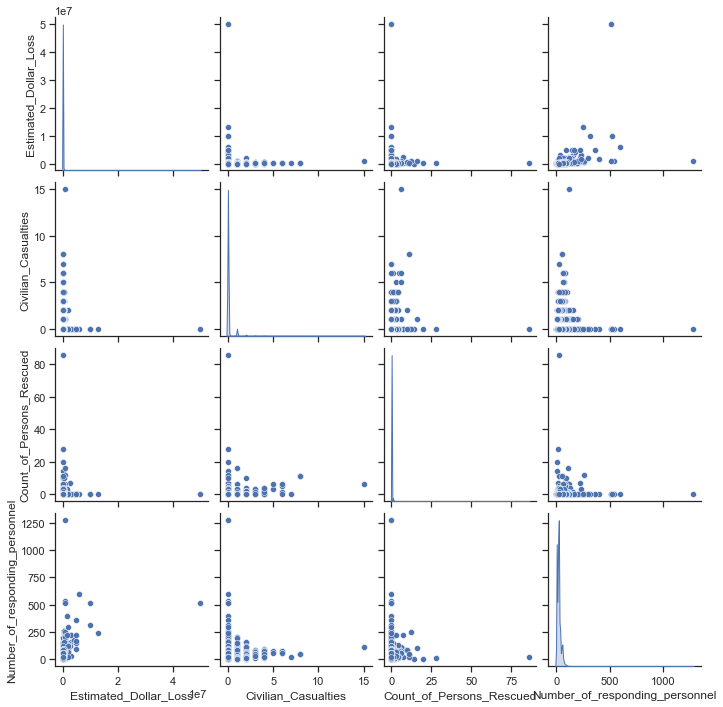

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
num_df = incident[['Estimated_Dollar_Loss','Civilian_Casualties','Count_of_Persons_Rescued',
                        'Number_of_responding_personnel','Number_of_responding_apparatus',
                         'Estimated_Number_Of_Persons_Displaced','TFS_Firefighter_Casualties',
                        'MINUTES_TO_LEAVE','MINUTES_TO_ARRIVE','label']]
#g = sns.pairplot(num_df, diag_kind="kde")
# hardly readable!!
g = sns.pairplot(num_df, diag_kind="kde", vars=['Estimated_Dollar_Loss','Civilian_Casualties','Count_of_Persons_Rescued',
                        'Number_of_responding_personnel'])
plt.show()

KeyError: 0

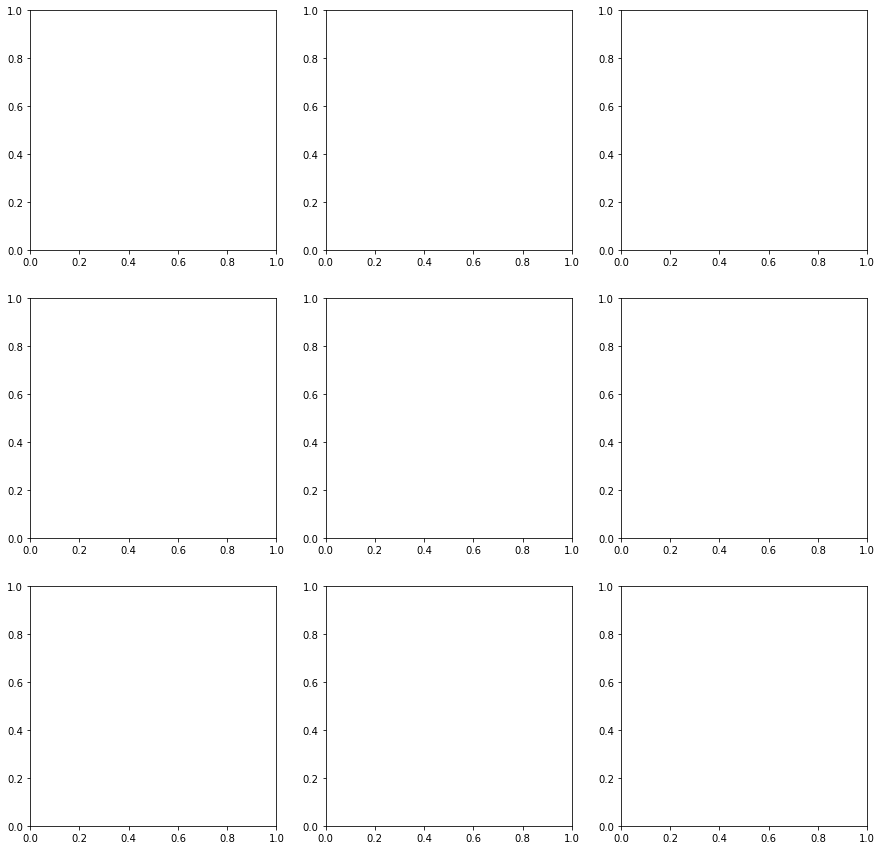

In [77]:
fig, axes= plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):

    incident[i]['MONTH'] = pd.DatetimeIndex(incident[i]['TFS_Alarm Time']).month
    maximum = incident[i].groupby(incident[i]['MONTH']).count()['TFS_Alarm_Time'].values.argmax() + 1

    ix = np.unravel_index(i, axes.shape)

    ax.plot(np.arange(1,13), incident[i].groupby(df[i]['MONTH']).count()['TFS_Alarm_Time'])
                                                              

    ax.axvline(x=maximum, color='black', linestyle='--', linewidth=2.5)
    ax.set_xticks(np.arange(1,13,1))
    ax.set_xlabel('Month', size=13)
    ax.set_ylabel('Total Fire Incidences', size=13)
    ax.set_title(f'201{i+1} Fire Incidence', size=13)
    ax.set_xlim(1,12)
    ax.set_ylim(6500, 14500)
    
    plt.tight_layout()

plt.show()

In [ ]:
# plot daily count of the incident (Final_Incident_Type)
# plot Final_Incident_Type

## categorical analysis

In [ ]:
# histograms on breakdown of metadata 
df_all['weekday'] = df_all['TFS Alarm Time'].dt.dayofweek + 1

qual = ['Initial CAD Event Type', 'Initial CAD Event Call Type', 'Final Incident Type', 
       'Event Alarm Level', 'Call Source', 'weekday']
fig, axes= plt.subplots(nrows=3, ncols=2)
# fig.delaxes(ax[3,1])

for index, i in enumerate(qual):
    
    ix = np.unravel_index(index, axes.shape)
    df_all[i].value_counts()[:10].plot(kind='bar', figsize=(15,30), ax=axes[ix], title=i)

    plt.xticks(rotation=45)

    plt.tight_layout()
plt.show()

In [47]:
cat_var = ['Area_of_Origin', 'Building_Status', 'Business_Impact','Extent_Of_Fire','Final_Incident_Type',
          'Fire_Alarm_System_Impact_on_Evacuation','Fire_Alarm_System_Operation','Fire_Alarm_System_Presence',
          'Ignition_Source','Initial_CAD_Event_Type','Level_Of_Origin','Material_First_Ignited',
          'Method_Of_Fire_Control','Possible_Cause',
           'Smoke_Alarm_at_Fire_Origin','Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
           'Smoke_Alarm_at_Fire_Origin_Alarm_Type','Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
           'Smoke_Spread', 'Sprinkler_System_Operation', 'Sprinkler_System_Presence',
          'Status_of_Fire_On_Arrival']
num_var = ['label','Count_of_Persons_Rescued','Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
          'Number_of_responding_apparatus','Number_of_responding_personnel','TFS_Firefighter_Casualties',
          'MINUTES_TO_ARRIVE', 'MINUTES_TO_LEAVE','IS_WEEKEND','DOW']

In [31]:
incident.head(3)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,INCIDENT_DATE,DOW,IS_WEEKEND,YEAR,MONTH,label,MINUTES_TO_ARRIVE,MINUTES_TO_LEAVE
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25 02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-25 02:04:29,2018-02-25 02:10:11,0,2018-02-25,6,1,2018,2,0,5.700,28.333
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25 02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25 02:24:43,2018-02-25 02:29:31,0,2018-02-25,6,1,2018,2,0,4.800,6.450
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaT,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25 19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 18:29:59,2018-02-25 18:36:49,0,2018-02-25,6,1,2018,2,0,6.833,37.233


In [40]:
incident.Level_Of_Origin.unique() # can be used for label encoder ...

array([nan, '999', '002', '011', '003', '001', '020', '007', '009', '004',
       'B01', '012', '006', '008', '005', '017', 'B02', '010', '997',
       '015', '996', '022', '029', '014', '018', '016', '019', '024',
       '027', '031', '998', '035', '013', '023', 'B03', 'B05', 'B04',
       '026', '025', '028', '021', '034', '039', '033', '037', '046',
       '047', '030', '032', 'B09', '041', 'B07', '054', '036', '038',
       '044', '050', '048', '043', '042'], dtype=object)

<AxesSubplot:title={'center':'Top 15 Area of Origin'}>

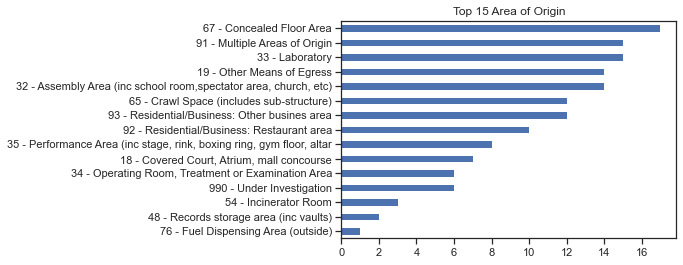

In [51]:
incident['Area_of_Origin'].value_counts(ascending=True)[:15].plot(kind='barh', title = 'Top 15 Area of Origin')
#save_fig('Top 15 Area of Origin')

<AxesSubplot:title={'center':'Top 15 business impact'}>

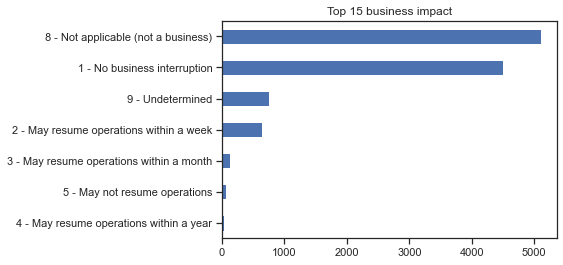

In [52]:
incident['Business_Impact'].value_counts(ascending=True)[:15].plot(kind='barh', title = 'Top 15 business impact')
#save_fig('Top 15 Area of Origin')

In [71]:
incident.Business_Impact.value_counts(dropna=False)

NaN                                         6322
8 - Not applicable (not a business)         5104
1 - No business interruption                4491
9 - Undetermined                             754
2 - May resume operations within a week      642
3 - May resume operations within a month     126
5 - May not resume operations                 63
4 - May resume operations within a year       34
Name: Business_Impact, dtype: int64

<AxesSubplot:title={'center':'Top 15 Building_Status'}>

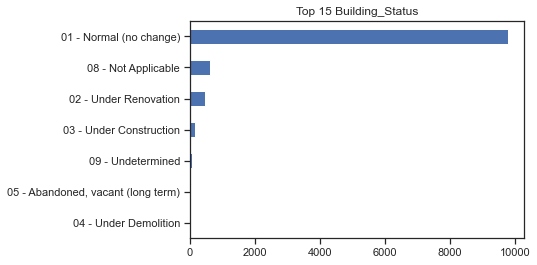

In [53]:
incident['Building_Status'].value_counts(ascending=True)[:15].plot(kind='barh', title = 'Top 15 Building_Status')

In [72]:
incident.Building_Status.value_counts(dropna=False)

01 - Normal (no change)               9797
NaN                                   6320
08 - Not Applicable                    631
02 - Under Renovation                  482
03 - Under Construction                152
09 - Undetermined                       83
05 - Abandoned, vacant (long term)      55
04 - Under Demolition                   16
Name: Building_Status, dtype: int64

In [43]:
incident.columns

Index(['_id_x', 'Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Ext_agent_app_or_defer_time', 'Extent_Of_Fire', 'Final_Incident_Type',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
       'Fire_Alarm_System_Presence', 'Fire_Under_Control_Time',
       'Ignition_Source', 'Incident_Number', 'Incident_Station_Area',
       'Incident_Ward', 'Initial_CAD_Event_Type', 'Intersection',
       'Last_TFS_Unit_Clear_Time', 'Latitude', 'Level_Of_Origin', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control',
       'Number_of_responding_apparatus', 'Number_of_responding_personnel',
       'Possible_Cause', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact

<AxesSubplot:title={'center':'Top 15 Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation'}>

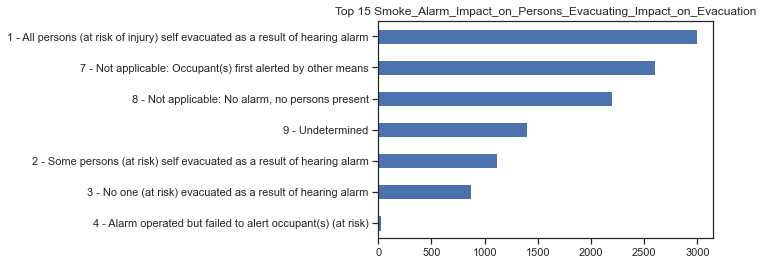

In [54]:
incident['Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Top 15 Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation')

<AxesSubplot:title={'center':'Top 15 Extent_Of_Fire'}>

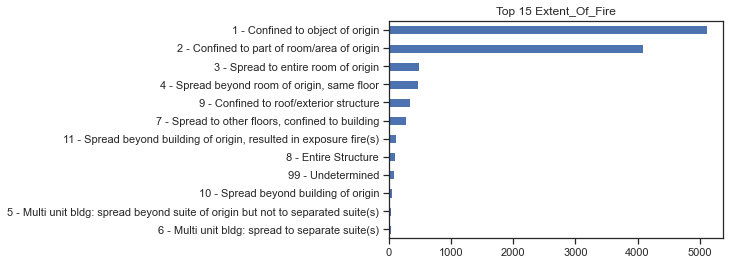

In [57]:
incident['Extent_Of_Fire'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Top 15 Extent_Of_Fire')

<AxesSubplot:title={'center':'Top 15 Level_Of_Origin'}>

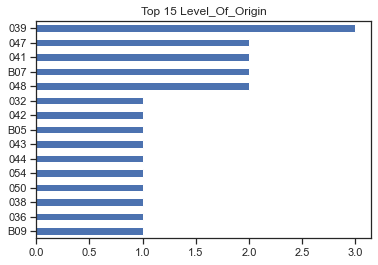

In [59]:
incident['Level_Of_Origin'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Top 15 Level_Of_Origin')

<AxesSubplot:title={'center':'Top 15 Material_First_Ignited'}>

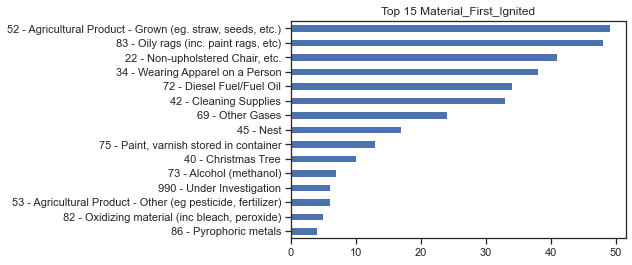

In [60]:
incident['Material_First_Ignited'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Top 15 Material_First_Ignited')

<AxesSubplot:title={'center':'Top 15 Initial_CAD_Event_Type'}>

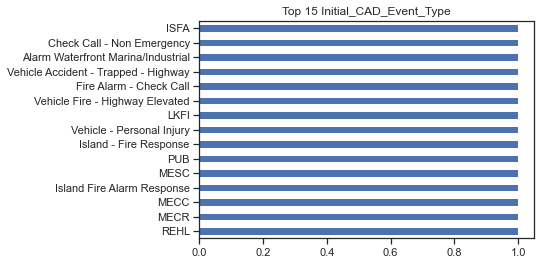

In [61]:
incident['Initial_CAD_Event_Type'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Top 15 Initial_CAD_Event_Type')

In [65]:
incident.Initial_CAD_Event_Type.value_counts()

FIR                                       3929
Fire - Grass/Rubbish                      1698
VEF                                       1652
FIHR                                      1617
FICI                                      1303
FIG                                        917
Fire - Residential                         898
FAHR                                       787
VEFH                                       548
Vehicle Fire                               478
Fire -  Highrise Residential               379
Fire - Commercial/Industrial               375
FACI                                       303
Alarm Highrise Residential                 235
FIHRD                                      199
FAR                                        175
Vehicle Fire - Highway                     157
FAHRD                                      154
FITP                                       113
FIS                                        107
CC                                          82
Alarm Commerc

<AxesSubplot:title={'center':'Ignition_Source'}>

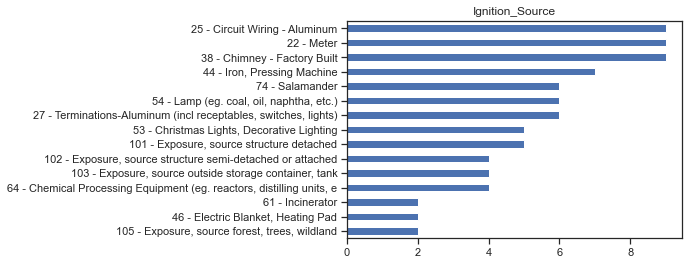

In [62]:
incident['Ignition_Source'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Ignition_Source')

<AxesSubplot:title={'center':'Smoke_Spread'}>

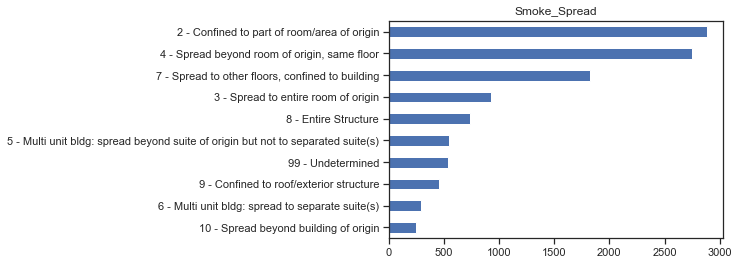

In [63]:
incident['Smoke_Spread'].value_counts(ascending=True)[:15].\
    plot(kind='barh', title = 'Smoke_Spread')

In [ ]:
# correlation for numerical and categorical variables
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

## Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
x.fit(adult_data['relationship'])
adult_data['relationship_cat'] = x.transform(adult_data['relationship'])

In [ ]:
## label encoding

from sklearn.preprocessing import OrdinalEncoder

#first strip the trailing and leading blanks
adult_data['education_clean'] = adult_data['education'].str.strip()

# initiate the encoder and ordered values as a list # impose the ordering this way!!
x = OrdinalEncoder(categories = [['Preschool' ,'1st-4th' ,'5th-6th' ,'7th-8th' ,'9th' ,'10th' ,'11th' ,
'12th' ,'HS-grad' ,'Prof-school' ,'Assoc-acdm' ,'Assoc-voc' ,'Some-college' ,'Bachelors' ,'Masters' ,'Doctorate']])

x.fit(adult_data[['education_clean']]) #fit
adult_data['education_cat'] = x.transform(adult_data[['education_clean']]) #transform the variable and return a string

In [ ]:
# WoE
## WoE for categorical variables
!pip install category_encoders
from category_encoders import WOEEncoder
x = WOEEncoder()
x.fit(adult_data['marital.status'],adult_data['income_ind'])
adult_data['ms_woe'] = x.transform(adult_data['marital.status'],adult_data['income_ind'])

In [ ]:
## Numerical encoding

## WoE for numeric variables
x = WOEEncoder()

#divide the 'age' variable into deciles
adult_data['age_bin_decile'] = pd.qcut(adult_data['age'], q=10, precision=0, labels = False).astype('str')

#pass the age decile in the woe calculation
x.fit(adult_data['age_bin_decile'],adult_data['income_ind'])
adult_data['age_woe'] = x.transform(adult_data['age_bin_decile'],adult_data['income_ind'])
#check the woe values
print(adult_data[['age_bin_decile','age_woe']].drop_duplicates().sort_values(by='age_woe'))

In [ ]:
## frequency encoding
from scipy.stats import rankdata
adult_data = pd.read_csv("adult.data.csv")

# create a dictionary of the value counts
ms_count = adult_data['marital.status'].value_counts(normalize=True).to_dict()
#in case you want to use counts
# ms_count = adult_data['marital.status'].value_counts().to_dict()
ms_count

# use map() function to replace the categories with the frequency values
adult_data['ms_cat'] = adult_data['marital.status'].map(ms_count)

In [ ]:
## target encoding
!pip install category_encoders
adult_data = pd.read_csv("adult.data.csv")

import category_encoders as ce
# sklearn does not support target encoding, we use category_encoders for that
# category_encoders have more other category encoder functions ...

enc = ce.TargetEncoder()
enc.fit(adult_data['marital.status'], adult_data['income_ind'])

adult_data['ms_cat'] = enc.transform(adult_data['marital.status'], adult_data['income_ind'])

adult_data.head()

## Numerical variables

In [ ]:
# interaction features??
X = df[features] # independent variables
y = df[['shares']] # dependent variable

# Create pairwise interaction features, skipping the constant bias term
# default value of degree is 2
poly = preproc.PolynomialFeatures(include_bias=False, degree=2) #only 2nd order polynomial are required
poly.fit(X)
X2 = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names(df[features].columns))

X2.shape

<AxesSubplot:title={'center':'Estimated dollar loss by month year'}, xlabel='YEAR'>

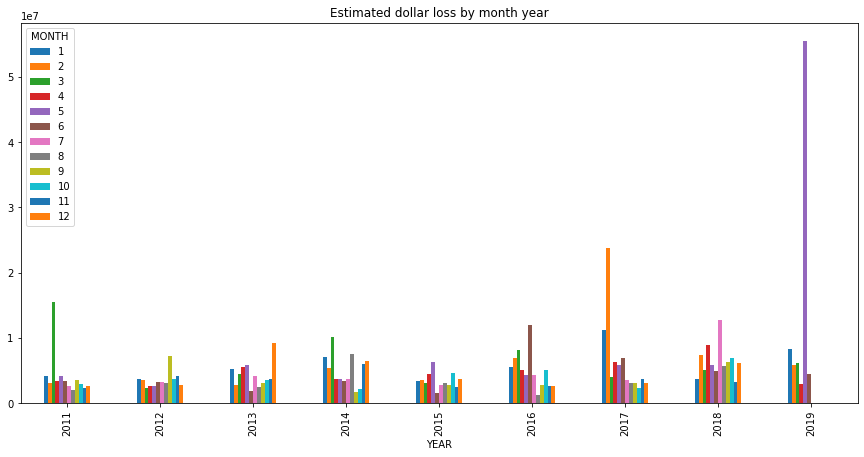

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['Estimated_Dollar_Loss'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Estimated dollar loss by month year')

#save_fig('Estimated_dollar_loss')

<AxesSubplot:title={'center':'Minutes to leave by month year'}, xlabel='YEAR'>

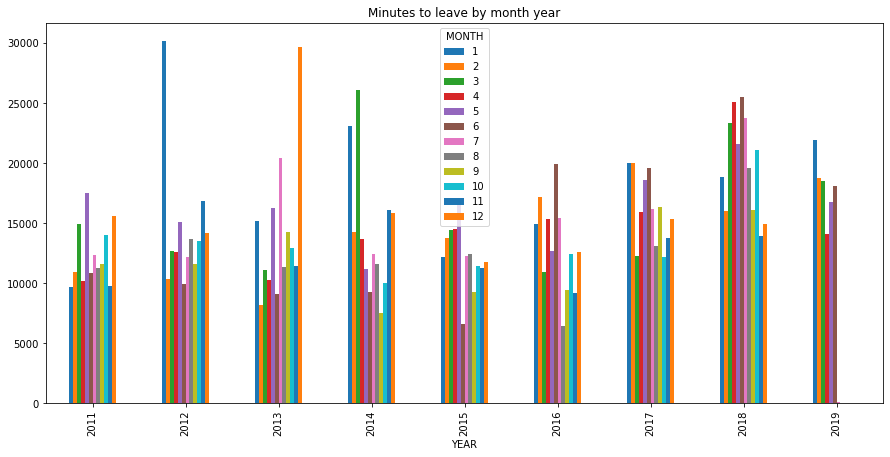

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['MINUTES_TO_LEAVE'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Minutes to leave by month year')

#save_fig('Civilian casualites')

<AxesSubplot:title={'center':'Minutes to arrive by month year'}, xlabel='YEAR'>

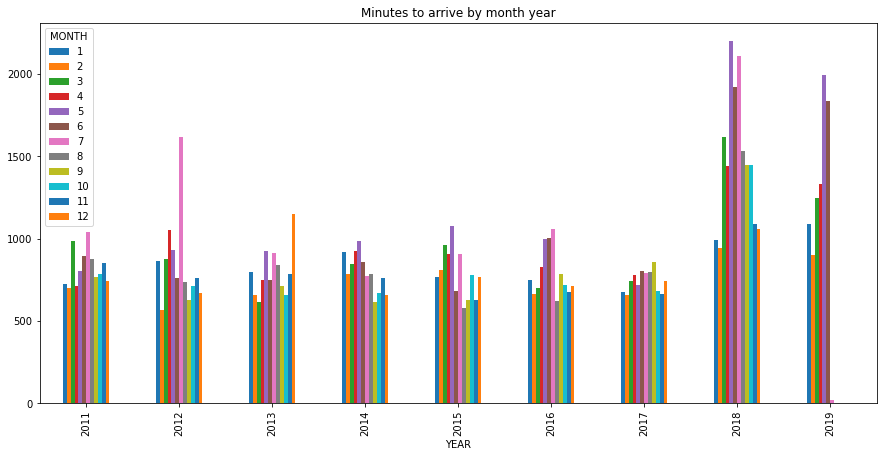

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['MINUTES_TO_ARRIVE'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Minutes to arrive by month year')

#save_fig('Civilian casualites')

<AxesSubplot:title={'center':'Civilian casualties by month year'}, xlabel='YEAR'>

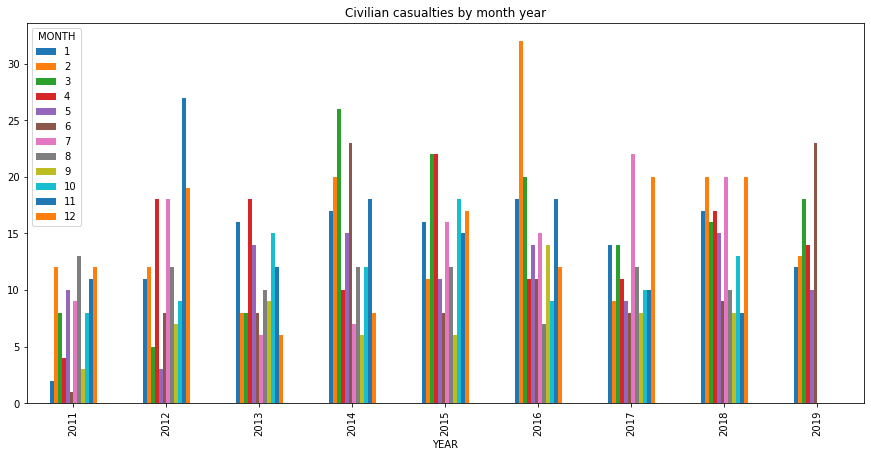

In [61]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['Civilian_Casualties'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Civilian casualties by month year')

#save_fig('Civilian casualites')

<AxesSubplot:title={'center':'Casualties or not by month year'}, xlabel='YEAR'>

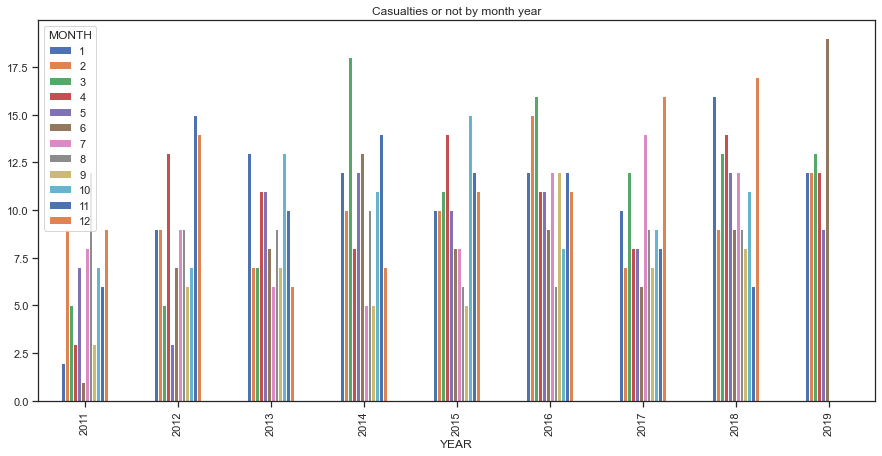

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['label'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Casualties or not by month year')

#save_fig('Civilian casualites')

<AxesSubplot:title={'center':'Number_of_responding_personnel by month year'}, xlabel='YEAR'>

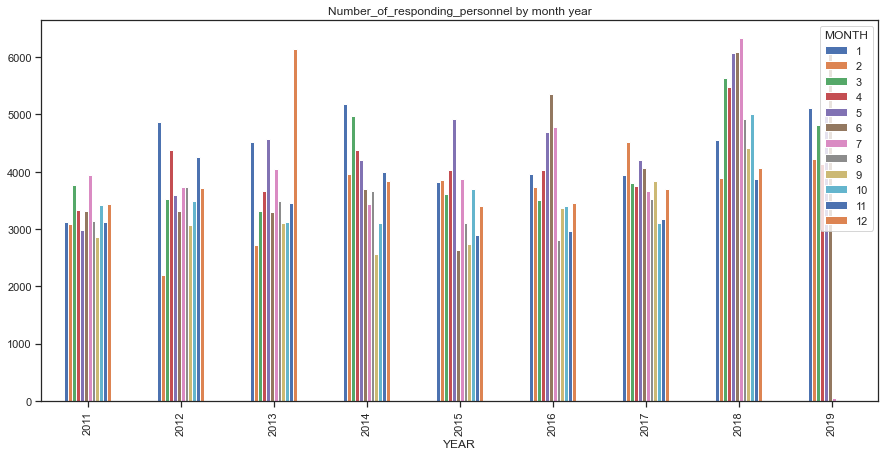

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH'])['Number_of_responding_personnel'].sum().unstack().plot(kind = 'bar', ax=ax,
                              title = 'Number_of_responding_personnel by month year')

#save_fig('Civilian casualites')

<AxesSubplot:title={'center':'Number of fire incidents by month year'}, xlabel='YEAR'>

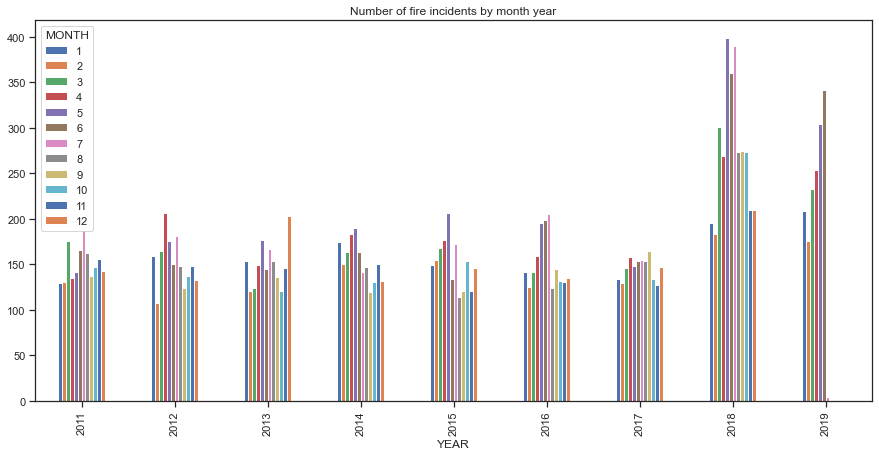

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
incident.groupby(['YEAR', 'MONTH']).size().unstack().plot(kind = 'bar', ax=ax,
                              title = 'Number of fire incidents by month year')

## correlation

In [52]:
incident.head(3)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,INCIDENT_DATE,DOW,IS_WEEKEND,label,MINUTES_ARRIVAL,MINUTES_TO_LEAVE,MINUTES_TO_ARRIVE
0,1946929,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25 02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-25 02:04:29,2018-02-25 02:10:11,0,2018-02-25,6,1,0,5.700,28.333,5.700
1,1946930,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25 02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25 02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25 02:24:43,2018-02-25 02:29:31,0,2018-02-25,6,1,0,4.800,6.450,4.800
2,1946931,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaT,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25 19:14:03,43.743230,NaN,-79.245061,NaN,NaN,6,22,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 18:29:59,2018-02-25 18:36:49,0,2018-02-25,6,1,0,6.833,37.233,6.833


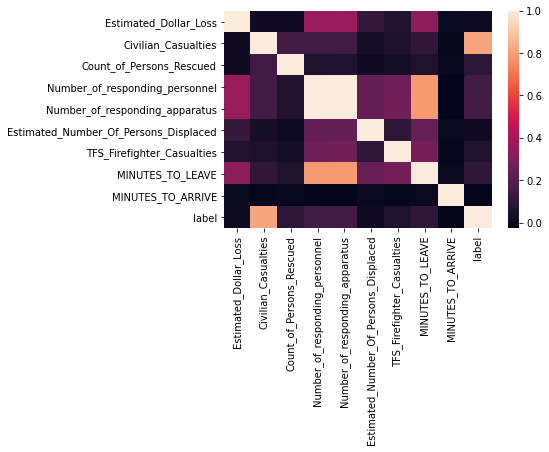

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

correlations = incident[['Estimated_Dollar_Loss','Civilian_Casualties','Count_of_Persons_Rescued',
                        'Number_of_responding_personnel','Number_of_responding_apparatus',
                         'Estimated_Number_Of_Persons_Displaced','TFS_Firefighter_Casualties',
                        'MINUTES_TO_LEAVE','MINUTES_TO_ARRIVE','label']].corr()
sns.heatmap(correlations)
plt.show()

In [33]:
correlations

,Estimated_Dollar_Loss,Civilian_Casualties,Count_of_Persons_Rescued,Number_of_responding_personnel,Number_of_responding_apparatus,Estimated_Number_Of_Persons_Displaced,TFS_Firefighter_Casualties,MINUTES_TO_LEAVE,MINUTES_TO_ARRIVE,label
Estimated_Dollar_Loss,1.000000,0.016699,0.013733,0.366768,0.366249,0.115061,0.063272,0.330843,0.000429,0.009210
Civilian_Casualties,0.016699,1.000000,0.153267,0.146202,0.149682,0.032552,0.052862,0.103104,-0.012701,0.816538
Count_of_Persons_Rescued,0.013733,0.153267,1.000000,0.060434,0.063579,0.007880,0.028896,0.055615,-0.003627,0.094851
Number_of_responding_personnel,0.366768,0.146202,0.060434,1.000000,0.996649,0.234586,0.264422,0.787706,-0.026613,0.147245
Number_of_responding_apparatus,0.366249,0.149682,0.063579,0.996649,1.000000,0.234265,0.266751,0.789064,-0.026271,0.149935
Estimated_Number_Of_Persons_Displaced,0.115061,0.032552,0.007880,0.234586,0.234265,1.000000,0.101038,0.244347,0.003530,0.016724
TFS_Firefighter_Casualties,0.063272,0.052862,0.028896,0.264422,0.266751,0.101038,1.000000,0.278390,-0.006883,0.056339
MINUTES_TO_LEAVE,0.330843,0.103104,0.055615,0.787706,0.789064,0.244347,0.278390,1.000000,-0.001689,0.099920
MINUTES_TO_ARRIVE,0.000429,-0.012701,-0.003627,-0.026613,-0.026271,0.003530,-0.006883,-0.001689,1.000000,-0.014897
label,0.009210,0.816538,0.094851,0.147245,0.149935,0.016724,0.056339,0.099920,-0.014897,1.000000


## correlations between numerical and categorical

In [34]:
# ANOVA TEST
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between label and categorical
# Assumption(H0) is that label and categorical are NOT correlated
 
# Finds out the minutes_to_leave data for each Method_Of_Fire_Control as a list
CategoryGroupLists=incident.groupby('Method_Of_Fire_Control')['MINUTES_TO_LEAVE'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
    # the value is very small (close to 0), hence we reject H0 of NOT correlated!!

P-Value for Anova is:  1.0720658754654569e-47


In [35]:
# Computing the correlation between MINUTES_TO_LEAVE (numerical) to all categorical variable
print("Numerical variable is MINUTES_TO_LEAVE")
for cat in cat_var:
    print("categorical variable is: ", cat)
    CategoryGroupLists=incident.groupby(cat)['MINUTES_TO_LEAVE'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', AnovaResults[1])
# ----- all p-value is very small, it seems they are all correlated with MINUTES_TO_LEAVE????

Numerical variable is MINUTES_TO_LEAVE
categorical variable is:  Area_of_Origin
P-Value for Anova is:  2.5649586933255617e-183
categorical variable is:  Building_Status
P-Value for Anova is:  5.162496962779558e-29
categorical variable is:  Business_Impact
P-Value for Anova is:  7.359448689356196e-230
categorical variable is:  Extent_Of_Fire
P-Value for Anova is:  0.0
categorical variable is:  Final_Incident_Type
P-Value for Anova is:  3.2554620941051156e-36
categorical variable is:  Fire_Alarm_System_Impact_on_Evacuation
P-Value for Anova is:  8.208480136397574e-23
categorical variable is:  Fire_Alarm_System_Operation
P-Value for Anova is:  7.488180474741318e-29
categorical variable is:  Fire_Alarm_System_Presence
P-Value for Anova is:  7.33111819534976e-34
categorical variable is:  Ignition_Source
P-Value for Anova is:  2.50549787437336e-28
categorical variable is:  Initial_CAD_Event_Type
P-Value for Anova is:  5.58755360803327e-75
categorical variable is:  Level_Of_Origin
P-Value for

In [36]:
# Computing the correlation between MINUTES_TO_LEAVE (numerical) to all categorical variable
print("Numerical variable is Number_of_responding_personnel")
for cat in cat_var:
    print("categorical variable is: ", cat)
    CategoryGroupLists=incident.groupby(cat)['Number_of_responding_personnel'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', AnovaResults[1])
# ----- all p-value is very small, it seems they are all correlated with MINUTES_TO_LEAVE????

Numerical variable is Number_of_responding_personnel
categorical variable is:  Area_of_Origin
P-Value for Anova is:  0.0
categorical variable is:  Building_Status
P-Value for Anova is:  3.2996047893211354e-43
categorical variable is:  Business_Impact
P-Value for Anova is:  6.688083154702765e-229
categorical variable is:  Extent_Of_Fire
P-Value for Anova is:  0.0
categorical variable is:  Final_Incident_Type
P-Value for Anova is:  1.4427237780267893e-178
categorical variable is:  Fire_Alarm_System_Impact_on_Evacuation
P-Value for Anova is:  4.2958653337028513e-17
categorical variable is:  Fire_Alarm_System_Operation
P-Value for Anova is:  2.9883726407406544e-13
categorical variable is:  Fire_Alarm_System_Presence
P-Value for Anova is:  2.6998478016483132e-11
categorical variable is:  Ignition_Source
P-Value for Anova is:  2.4824267280450402e-130
categorical variable is:  Initial_CAD_Event_Type
P-Value for Anova is:  0.0
categorical variable is:  Level_Of_Origin
P-Value for Anova is:  2.

In [37]:
# Computing the correlation between MINUTES_TO_LEAVE (numerical) to all categorical variable
print("Numerical variable is Number_of_responding_apparatus")
for cat in cat_var:
    print("categorical variable is: ", cat)
    CategoryGroupLists=incident.groupby(cat)['Number_of_responding_apparatus'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', AnovaResults[1])
# ----- all p-value is very small, it seems they are all correlated with MINUTES_TO_LEAVE????

Numerical variable is Number_of_responding_apparatus
categorical variable is:  Area_of_Origin
P-Value for Anova is:  0.0
categorical variable is:  Building_Status
P-Value for Anova is:  5.2294543949494256e-42
categorical variable is:  Business_Impact
P-Value for Anova is:  4.575189799342395e-228
categorical variable is:  Extent_Of_Fire
P-Value for Anova is:  0.0
categorical variable is:  Final_Incident_Type
P-Value for Anova is:  8.350998477867845e-170
categorical variable is:  Fire_Alarm_System_Impact_on_Evacuation
P-Value for Anova is:  7.180047765238746e-19
categorical variable is:  Fire_Alarm_System_Operation
P-Value for Anova is:  4.638354395442718e-13
categorical variable is:  Fire_Alarm_System_Presence
P-Value for Anova is:  3.426595262305689e-10
categorical variable is:  Ignition_Source
P-Value for Anova is:  1.072223166996934e-120
categorical variable is:  Initial_CAD_Event_Type
P-Value for Anova is:  0.0
categorical variable is:  Level_Of_Origin
P-Value for Anova is:  6.47701

In [48]:
from dython import nominal
var = cat_var + num_var
var

['Area_of_Origin',
 'Building_Status',
 'Business_Impact',
 'Extent_Of_Fire',
 'Final_Incident_Type',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Alarm_System_Presence',
 'Ignition_Source',
 'Initial_CAD_Event_Type',
 'Level_Of_Origin',
 'Material_First_Ignited',
 'Method_Of_Fire_Control',
 'Possible_Cause',
 'Smoke_Alarm_at_Fire_Origin',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
 'Smoke_Spread',
 'Sprinkler_System_Operation',
 'Sprinkler_System_Presence',
 'Status_of_Fire_On_Arrival',
 'label',
 'Count_of_Persons_Rescued',
 'Estimated_Dollar_Loss',
 'Estimated_Number_Of_Persons_Displaced',
 'Number_of_responding_apparatus',
 'Number_of_responding_personnel',
 'TFS_Firefighter_Casualties',
 'MINUTES_TO_ARRIVE',
 'MINUTES_TO_LEAVE',
 'IS_WEEKEND',
 'DOW']

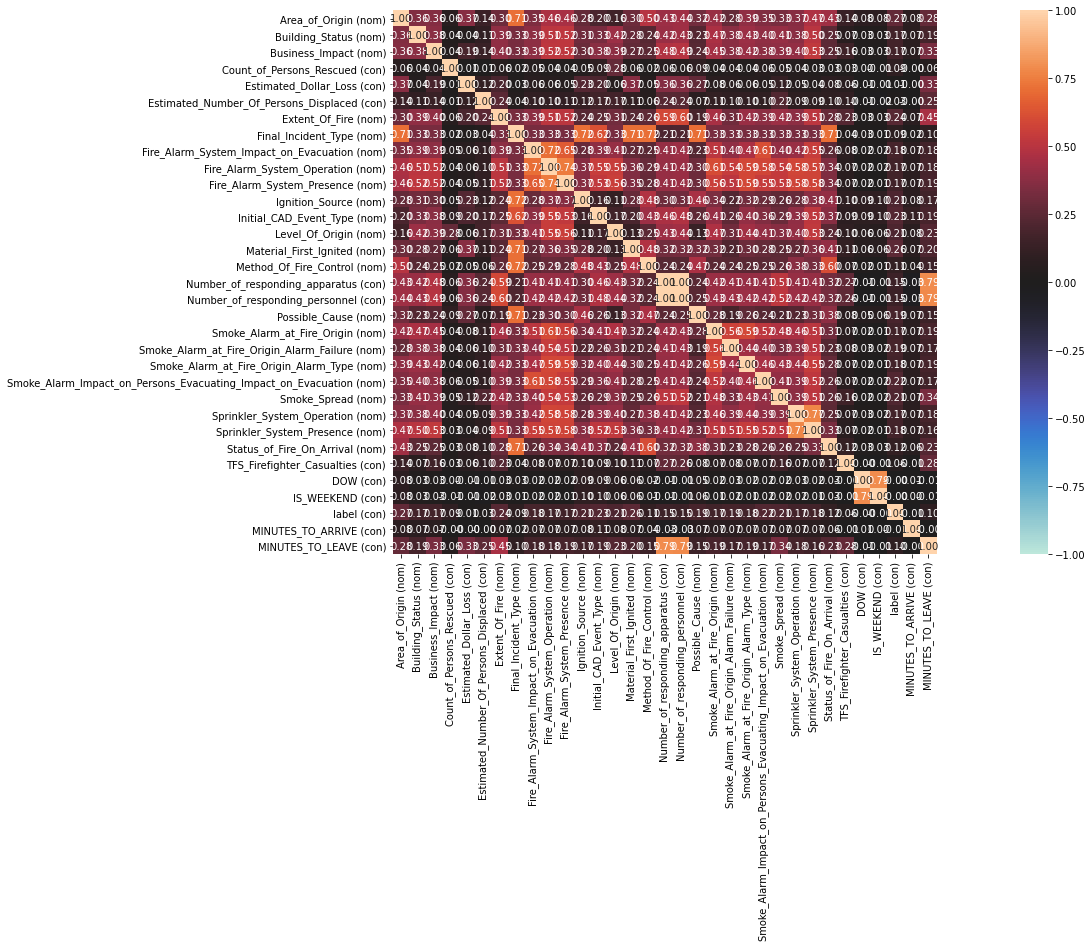

{'corr':                                                     Area_of_Origin (nom)  \
 Area_of_Origin (nom)                                            1.000000   
 Building_Status (nom)                                           0.356411   
 Business_Impact (nom)                                           0.362001   
 Count_of_Persons_Rescued (con)                                  0.064139   
 Estimated_Dollar_Loss (con)                                     0.370526   
 Estimated_Number_Of_Persons_Displaced (con)                     0.142563   
 Extent_Of_Fire (nom)                                            0.299248   
 Final_Incident_Type (nom)                                       0.712515   
 Fire_Alarm_System_Impact_on_Evacuation (nom)                    0.347003   
 Fire_Alarm_System_Operation (nom)                               0.463070   
 Fire_Alarm_System_Presence (nom)                                0.456901   
 Ignition_Source (nom)                                           0.2

In [49]:
nominal.associations(incident[incident.columns.intersection(var)],figsize=(30,10),mark_columns=True)

# Missing and imputation

In [ ]:
df = incident.copy()
del incident

In [ ]:
titanic['Age_mean_imputed'] = titanic['Age'].fillna(titanic['Age'].mean()) # mean imputation
titanic['Age_median_imputed'] = titanic['Age'].fillna(titanic['Age'].median()) # median imputation
# check old and new mean
titanic['Age'].mean(), titanic['Age_mean_imputed'].mean(), titanic['Age_median_imputed'].mean()

In [ ]:
#Mode imputation ==> for categorical variable
titanic['Embarked_mode_imputed'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])
    # the top value is at index 0
#checking old and new frequency count
titanic['Embarked'].value_counts(dropna=False)  , titanic['Embarked_mode_imputed'].value_counts(dropna=False) 

In [ ]:
## arbitrary value imputation
## choose a value which is at the right end of the distribution

titanic.loc[titanic.Age ==99,['Age']].head(5) # ensuring 99 does not already exist in the data

titanic['Age_arbit_imputed'] = titanic['Age'].fillna(99)
titanic.loc[titanic.Age_arbit_imputed ==99,['Age_arbit_imputed','Age']].head(5)

In [ ]:
# check if the imputation changed the distribution of the age or not

from scipy.stats import mannwhitneyu
mannwhitneyu(titanic["Age"], titanic["Age_arbit_imputed"])

# the p-value is not significant, meaning the imputation didn't cause significant change to the distribution of 
# the data.
# if p < 0.05, means differ significantly

In [ ]:
## segment based imputation
# replace missing values based on the passanger class (pclass)
 
titanic['Age_Grp_mean_imputed'] = titanic.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
## missing indicator
## create an missing indicator variable whenever you do missing value imputation

titanic['Age_missing_ind'] = titanic['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [ ]:
df['Estimated_Dollar_Loss'] = df['Estimated_Dollar_Loss'].fillna(df['Estimated_Dollar_Loss'].median())

In [ ]:
# Imputation for numerical ...

# Fill any NAN data with the average of the column
for key, value in df.iteritems():
    if np.issubdtype(df[key].dtype, np.number) == True:
        _v = df[key].mean()
        df[key].fillna(value=_v)

## (1a) supplemental dataset for additional feature creation

In [9]:
# fire station location: https://open.toronto.ca/dataset/fire-station-locations/
fs_loc = pd.read_csv('data/fire-station-locations.csv')
print(fs_loc.shape)
fs_loc.head(3)

(84, 23)


,_id,ID,NAME,ADDRESS,ADDRESS_POINT_ID,ADDRESS_ID,CENTRELINE_ID,MAINT_STAGE,ADDRESS_NUMBER,LINEAR_NAME_FULL,POSTAL_CODE,GENERAL_USE,CLASS_FAMILY_DESC,ADDRESS_ID_LINK,PLACE_NAME,X,Y,LATITUDE,LONGITUDE,WARD_NAME,MUNICIPALITY_NAME,OBJECTID,geometry
0,1,21,FIRE STATION 211,900 TAPSCOTT RD,4236992,363382,4236991,REGULAR,900,Tapscott Rd,NaN,Fire/Ambulance Stations,"Land, Structure, Structure Entrance",NaN,"Fire Station 211, Ambulance Station 27",NaN,NaN,NaN,NaN,Scarborough North (23),Scarborough,1520443,"{u'type': u'Point', u'coordinates': (-79.24287..."
1,2,60,FIRE STATION 342,106 ASCOT AVE,764237,70190,1140634,REGULAR,106,Ascot Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 342,NaN,NaN,NaN,NaN,Davenport (9),former Toronto,1541526,"{u'type': u'Point', u'coordinates': (-79.44862..."
2,3,61,FIRE STATION 343,65 HENDRICK AVE,819425,127148,1140587,REGULAR,65,Hendrick Ave,NaN,Fire Station,"Land, Structure, Structure Entrance",NaN,Fire Station 343,NaN,NaN,NaN,NaN,Toronto-St. Paul's (12),former Toronto,1543317,"{u'type': u'Point', u'coordinates': (-79.43075..."


In [10]:
# fire hydrants location: https://open.toronto.ca/dataset/fire-hydrants/
fh_loc = pd.read_csv('data/Fire Hydrants Data.csv')
print(fh_loc.shape)
fh_loc.head(3)

(41936, 6)


,_id,FACILITYID,LOCDESC,X_COORDINATE,Y_COORDINATE,geometry
0,1,HY4014837,99 BEVERLY HILLS DR ACROSS 2ND SOUTH OF WILSO...,303523.657,4841793.384,"{u'type': u'Point', u'coordinates': (-79.51564..."
1,2,HY4019330,62m South 82 CARNFORTH RD,319369.222,4843857.194,"{u'type': u'Point', u'coordinates': (-79.31893..."
2,3,HY1356043,21m West 67 DUNCANNON DR,311870.194,4840197.712,"{u'type': u'Point', u'coordinates': (-79.41208..."


## (1b) extra additional dataset


# Create features

In [ ]:
# to convert to categorial ...
df_fire["CAD_TYPE"] = pd.Categorical(df_fire["CAD_TYPE"])

import holidays
# default is ontario holidays
for date, name in holidays.CA(prov = 'ON', years = 2014).items():
  print(date, name)

CA_holidays=[]
for date in holidays.CA(years = 2014).items():
  CA_holidays.append(str(date[0]))

print(CA_holidays)

df['Is_Holiday'] = [1 if str(val).split()[0] in CA_holidays else 0 for val in df['page_visit_ts']]

## Lag Window Features
df['lag_1'] = df['temp'].shift(1)
df['lag_2'] = df['temp'].shift(2)
df['lag_3'] = df['temp'].shift(3)

## Sliding Window Features

df['sliding_3d_avg'] = df['temp'].rolling(window=3).mean() # rolling 3 day average
df['sliding_5d_avg'] = df['temp'].rolling(window=5).mean() # rolling 5 day average

# Feature scaling